---
Nome: Caio Ruiz Coldebella

RA: 232621


---

#L2 - Lendo, escrevendo e manipulando imagens como matrizes#

**Objetivo:** Exercitar manipulações de amostragem de imagens, entendendo seus efeitos. 

**Motivação:** Diferentes aspectos afetam a resolução de uma imagem.

---

### Exercício 1 ###

O código abaixo lê uma imagem que está armazenada num repositório do Github, apresenta a imagem na tela e a transforma num array numpy.

In [ ]:
!git clone https://github.com/pdpcosta/teaching-ea979.git # clones github repo to access playground images
from PIL import Image
import numpy as np

fatal: destination path 'teaching-ea979' already exists and is not an empty directory.


In [ ]:
img=Image.open('./teaching-ea979/images/flower.pgm') # opens flower.pgm file and stores its information on a variable
f=np.asarray(img)
print(f)
# Insira aqui o código do Exercício 1
print(f.shape)
print(f.ndim)
min,max = 100,0
for i in range(400):
  for j in range(400):
    if(f[i][j]>max):
      max = f[i][j]
    if(f[i][j]<min):
      min = f[i][j]
print("Maior intensidade de pixel: %d, Menor intensidade de pixel: %d" %(max,min))

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]
(400, 400)
2
Maior intensidade de pixel: 253, Menor intensidade de pixel: 0


Usando funções do `numpy` responda as questões a seguir.

**(1.1)** Qual a resolução em pixels da imagem?

*`RESPOSTA:`* 400x400 pixels

**(1.2)** Qual a profundidade da imagem?

*`RESPOSTA: `* Profundidade 1

**(1.3)** Classifique a imagem como monocromática (binária, grayscale) ou multibanda (tentando identificar o padrão multibanda adotado).

*`RESPOSTA: `* Vemos no comando print(img.getbands()) que a única banda é L, ou seja a imagem é monocromática grayscale

**(1.4)** Qual o maior e o menor valor de intensidade de pixel da imagem?

*`RESPOSTA: `* O maior e o menor valor de intensidade de pixel são respectivamente 253 e 0

**(1.5)** Usando atributos do tipo [`Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html#image-attributes) da biblioteca `PIL`, tente responder as mesmas perguntas de (1.1) a (1.4).

In [ ]:
# Insira aqui o código para a questão (1.5)
print(img.height, img.width)
print(img.mode)
print(img.getbands())
min,max = 100,0
for i in range(400):
  for j in range(400):
    if(img.getpixel((i,j))>max):
      max = img.getpixel((i,j))
    if(img.getpixel((i,j))<min):
      min = img.getpixel((i,j))
print("Maior intensidade de pixel: %d, Menor intensidade de pixel: %d" %(max,min))

400 400
L
('L',)
Maior intensidade de pixel: 253, Menor intensidade de pixel: 0


---
### Exercício 2 ###

Para apresentar um objeto `Image` do PIL na tela, usamos a função `display()`.

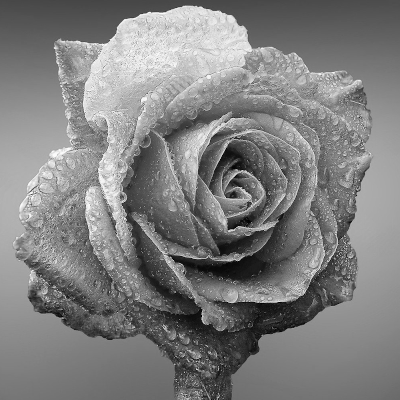

In [ ]:
display(img)

É bastante útil poder transformar `Images` em PIL em arrays `numpy`, e vice-versa. Isso permitirá que realizemos operações matriciais nas imagens e posteriormente possamos visualizar (e salvar em arquivos) as imagens processadas. O código abaixo mostra como transformar um array numa imagem, apresentando-a na tela, enfatizando que alguns cuidados devem ser tomados.

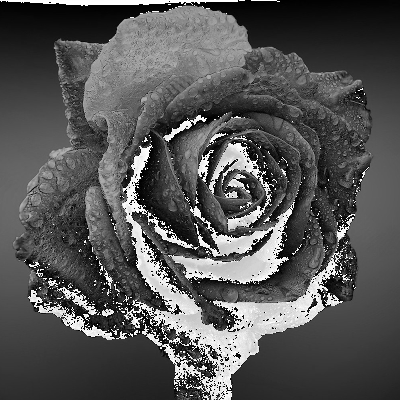

In [ ]:
# Vou escurecer a imagem, subtraindo um valor dos pixels do array f.
g=f-73
# Agora vou transformar o array numa imagem PIL
g_img=Image.fromarray(g)
# Bóra ver o resultado?
display(g_img)

Parece que não deu muito certo né?

**(2.1)** Explique porque ao subtrair um determinado valor de intensidade da imagem original algumas regiões da imagem ficaram saturadas em branco.

`RESPOSTA:`

A **principal mensagem** é que podemos realizar operações quaisquer com os valores de pixel mas, no fim do dia, caso queiramos visualizar essas imagens, temos que pensar como esses valores serão mapeados para uma codificação que faça sentido no seu sistema computacional de apresentação.

Em particular, estamos usando a biblioteca PIL para converter arrays em objetos de imagens. No seu modo default, essa conversão espera ler arrays de 8-bits, com valores de 0 a 255 (`uint8`).

No código abaixo, vamos tentar superar a limitação da operação matemática realizada em 'uint8', aumentando a profundidade em bits da variável matricial.

Após a operação matemática matricial realizada em outra profundidade de bits, é necessário se preocupar com a adequada conversão para `uint8`.

Esse é o array após subtração em int16:
 [[-1 -1 -1 ...  5  4  4]
 [ 0 -1  0 ...  5  5  5]
 [ 0  0  1 ...  5  5  6]
 ...
 [45 44 43 ... 34 34 33]
 [43 42 42 ... 33 33 33]
 [43 43 42 ... 33 33 33]] 

Esse é o array após o clipping entre 0 e 255:
 [[ 0  0  0 ...  5  4  4]
 [ 0  0  0 ...  5  5  5]
 [ 0  0  1 ...  5  5  6]
 ...
 [45 44 43 ... 34 34 33]
 [43 42 42 ... 33 33 33]
 [43 43 42 ... 33 33 33]] 

Será que vai funcionar?



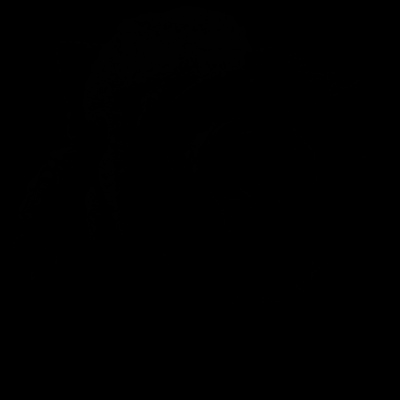


 Não. Não funcionou. Faltou a conversão da matriz para uint8. 



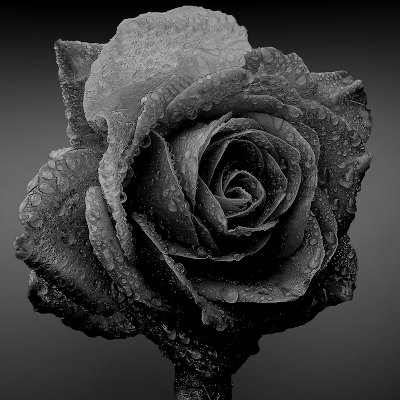

In [ ]:
# Vamos tentar de novo.
h=f.astype('int16')-73
print('Esse é o array após subtração em int16:\n',h,'\n')
h=np.clip(h,0,255)
print('Esse é o array após o clipping entre 0 e 255:\n',h,'\n')
h_img=Image.fromarray(h) #Isso não vai funcionar
print("Será que vai funcionar?\n")
display(h_img)
print("\n Não. Não funcionou. Faltou a conversão da matriz para uint8. \n")
h_img=Image.fromarray(h.astype('uint8')) #Agora sim, isso vai funcionar
display(h_img)

**(2.2)** Reutilize o código do Exercício 3, L1, que gera uma matriz 150x150 de zeros, com um quadrado central de 50 x 50 de 1's. Apresente essa imagem na tela de maneira que vejamos um quadrado branco com um quadrado preto em seu centro.


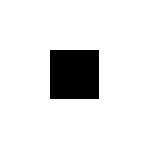

In [ ]:
matriz = np.zeros((150,150),dtype='uint8')
matriz +=255
for i in range(50,99,1):
  for j in range(50,99,1):
    matriz[i][j] = 0
matriz_img=Image.fromarray(matriz)
display(matriz_img)

**(2.3)** Salve a imagem do item anterior num arquivo na pasta `sandbox` do ambiente Classroom da disciplina. O nome do seu arquivo deve seguir o padrão `L2-loginDAC (Exemplo: L2-p971364)`. Salve três versões do arquivo, com extensões: `.pgm`, `.jpg` e `.bmp`. Abra o arquivo salvo no seu computador. Comente sobre as diferenças encontradas entre os três formatos de arquivo. Veja código de exemplo abaixo com imagem da flor.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Ao executar esse comando você deverá autorizar o Google Colab acessar sua área Unicamp
path = "2022.1 EA979A F790A"
sandbox='/content/drive/MyDrive/Classroom/'+path+'/sandbox/'
matriz_img.save(sandbox+"c232621.pgm")
matriz_img.save(sandbox+"c232621.jpg")
matriz_img.save(sandbox+"c232621.bmp")

matrizpgm=Image.open(sandbox+"c232621.pgm")
fpgm=np.asarray(matrizpgm)
matrizjpg=Image.open(sandbox+"c232621.jpg")
fjpg=np.asarray(matrizjpg)
matrizbmp=Image.open(sandbox+"c232621.bmp")
fbmp=np.asarray(matrizbmp)
#np.set_printoptions(threshold=np.inf,linewidth=800)
#print("PGM:\n",fpgm)
#print("JPG:\n",fjpg)
#print("BMP:\n",fbmp)
#Descomentar as 4 linhas acima para observar a saída, comentei por praticidade devido ao tamanho da saída na tela

# O formato jpg distorceu as bordas internas da imagem, na regiao de divisa entre
#o branco e o preto alguns valores foram alterados, enquanto nos formatos pgm e bmp
#todos os valores dos pixels foram preservados

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


### Exercício 3 ###

Opere a matriz `f` gerada a partir da leitura da imagem `flower.pgm` no Exercício 1, e gere os seguintes resultados, inspirados na Figura 2.25 do Capítulo 2, do livro de Digital Image Processing, Gonzalez & Woods, 2a edição.

**(3.1)** Opere a imagem para que ela passe a ter dimensões 800 x 800. Apresente o resultado na tela.

**(3.2)** Opere a imagem para que ela passe a ter dimensões 20 x 20. Apresente o resultado na tela.

Imagem 800x800: 



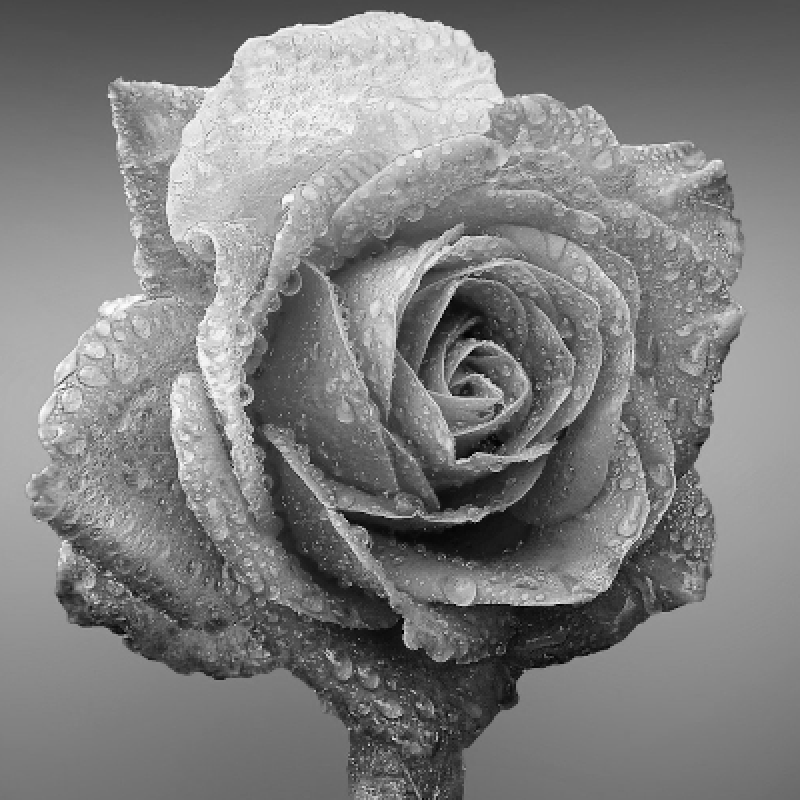

###############################################################################################
Imagem 20x20: 



In [ ]:
img=Image.open('./teaching-ea979/images/flower.pgm') # opens flower.pgm file and stores its information on a variable
f=np.asarray(img)
# 3.1
f800 = np.array([[0 for l in range(800)] for k in range(800)])
for i in range(f.shape[0]):
  for j in range(f.shape[1]):
    f800[i*2][j*2] = f[i][j]
    f800[i*2][j*2+1]=f[i][j]
    f800[i*2+1][j*2]=f[i][j]
    f800[i*2+1][j*2+1]=f[i][j]  
img800=Image.fromarray(f800.astype('uint8'))
print("Imagem 800x800: \n")
display(img800)
# 3.2
f20 = np.array([[0 for l in range(20)] for k in range(20)])
for i in range(20):
  for j in range(20):
    f20[i][j] = f[i*20][j*20]
img20=Image.fromarray(f20.astype('uint8'))
print("###############################################################################################")
print("Imagem 20x20: \n")
display(img20)




---


### Exercício 4 ###

Considere a matriz `f` gerada a partir da leitura da imagem `flower.pgm`. Essa imagem é apresentada em 256 níveis de cinza, associados à sua codificação em 8 bits.

**(4.1)** Realize uma nova amostragem da imagem, supondo que você só tem 2^7=128 níveis de cinza, ou 7 bits, para codificar a imagem. Apresente o resultado da imagem com a nova quantização na tela.

**(4.2)** Repita a operação supondo que a imagem `f` terá que ser salva utilizando-se apenas 4 bits para cada pixel. Apresente o resultado da imagem com a nova quantização na tela.

**(4.3)** Qual o principal efeito visual observado quando reduzimos os níveis de quantização de uma imagem?

`RESPOSTA:`O principal efeito observado é o surgimento de "listras" no fundo da imagem, devido à transição entre os niveis de cinza do fundo serem menos suavizados, além disso observa-se um empobrecimento das sombras das pétalas

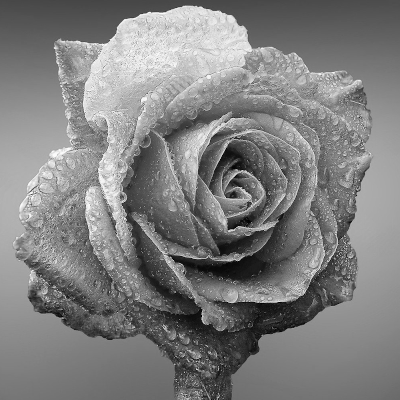

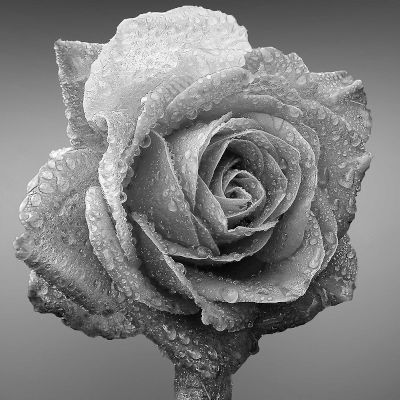

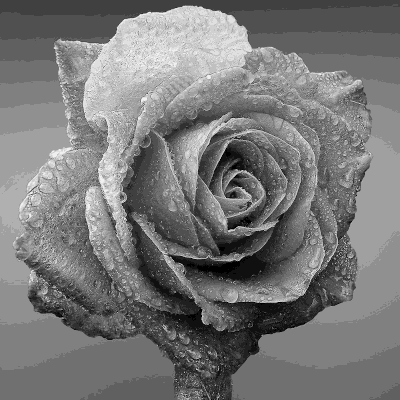

In [ ]:
#4.1
fcopia = (f.copy()).astype('uint16')
fcopia //= 2
fcopia *=2
img7=Image.fromarray(fcopia.astype('uint8'))
display(img)
display(img7)
#4.2
f4bits = (f.copy()).astype('uint16')
f4bits //= 16
f4bits *= 16
img4 = Image.fromarray(f4bits.astype('uint8'))
display(img4)

---
👂 🧐 (OPCIONAL, mas super bem-vindo) Comente abaixo as principais dificuldades que teve na realização das atividades.  
---
A principal dificuldade foi armazenar as imagens na pasta do drive, porém também foi um pouco trabalhoso aumentar e diminuir as dimensões das imagens